In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TextVectorization

In [3]:
#reads a file. Each line has the format: label text
#Returns a list with the text and a list with the labels
def readData(fname):

    with open(fname, 'r', encoding="utf-8") as f:
        fileData = f.read()
  
    lines = fileData.split("\n")
    textData = list()
    textLabel = list()
    lineLength = np.zeros(len(lines))
    
    for i, aLine in enumerate(lines):     
        if not aLine:
            break  
        label = aLine.split(" ")[0]
        lineLength[i] = len(aLine.split(" "))
        if(label == "__label__1"):
            textLabel.append(0)
            textData.append(aLine.removeprefix("__label__1 "))

        elif(label == "__label__2"):
            textLabel.append(1)
            textData.append(aLine.removeprefix("__label__2 "))

        else:
            print("\nError in readData: ", i, aLine)
            exit()
    
    f.close()
    return textData, textLabel, int(np.average(lineLength)+2*np.std(lineLength))

In [4]:
 def transformData(x_train, y_train, x_test, y_test, maxFeatures, seqLength):
     #transforms text input to int input based on the vocabulary
     #max_tokens = maxFeatures is the size of the vocabulary
     #output_sequence_length =  seqLength is the maximum length of the transformed text. Adds 0 is text length is shorter
     precLayer = TextVectorization(max_tokens = maxFeatures, 
     standardize =  'lower_and_strip_punctuation', split = 'whitespace', output_mode = 'int', 
     output_sequence_length =  seqLength) # removed layers.experimental.preprocessing.
     precLayer.adapt(x_train)
     #print(precLayer.get_vocabulary())
     x_train_int = precLayer(x_train)
     y_train = tf.convert_to_tensor(y_train)
     #print(x_train_int)
     #print(y_train)
     x_test_int= precLayer(x_test)
     y_test = tf.convert_to_tensor(y_test)
     #print(x_test_int)
     #print(y_test)

     return x_train_int, y_train, x_test_int, y_test

# Transforming Data 
#def transformData(x_train, y_train, x_test, y_test, maxFeatures, seqLength):
#    precLayer = TextVectorization(
#        max_tokens=maxFeatures,
#        standardize='lower_and_strip_punctuation',
#        split='whitespace',
#        output_mode='int',
#        output_sequence_length=seqLength
#    )
#    precLayer.adapt(x_train)
#
#    x_train_int = precLayer(x_train)
#    y_train = tf.convert_to_tensor(y_train)
#
#    x_test_int = precLayer(x_test)
#    y_test = tf.convert_to_tensor(y_test)
#
#    return x_train_int, y_train, x_test_int, y_test, precLayer

In [5]:
# Loading data
maxFeatures = 10000
embedding_dim = 128

x_train, y_train, seqLength = readData("amazon/train_small.txt")
x_test, y_test, _ = readData("amazon/test_small.txt")

x_train_int, y_train, x_test_int, y_test = transformData(
    x_train, y_train, x_test, y_test, maxFeatures, seqLength
)

print("Data loaded and transformed successfully.")


Data loaded and transformed successfully.


In [6]:
from models import lstm_model, gru_model, bidirectional_lstm_model

In [ ]:
model = lstm_model(maxFeatures, seqLength, embedding_dim, rnn_units=64)

history = model.fit(
    x_train_int, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

loss, accuracy = model.evaluate(x_test_int, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/5


C:\Users\Administrator\miniconda3\envs\DL\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.5043 - loss: 0.6936 - val_accuracy: 0.5254 - val_loss: 0.6921
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 243ms/step - accuracy: 0.5148 - loss: 0.6928 - val_accuracy: 0.5272 - val_loss: 0.6916
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 243ms/step - accuracy: 0.5450 - loss: 0.6937 - val_accuracy: 0.5658 - val_loss: 0.6729
Epoch 4/5
 15/157 ━━━━━━━━━━━━━━━━━━━━ 33s 238ms/step - accuracy: 0.5817 - loss: 0.6661

In [13]:
# Create and train LSTM
lstm = lstm_model(maxFeatures, seqLength, embedding_dim)
history_lstm = lstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train GRU
gru = gru_model(maxFeatures, seqLength, embedding_dim)
history_gru = gru.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train Bidirectional LSTM
bilstm = bidirectional_lstm_model(maxFeatures, seqLength, embedding_dim)
history_bilstm = bilstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 283ms/step - accuracy: 0.5175 - loss: 0.6935 - val_accuracy: 0.4758 - val_loss: 0.6936
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 281ms/step - accuracy: 0.5195 - loss: 0.6928 - val_accuracy: 0.5248 - val_loss: 0.6924
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - accuracy: 0.5244 - loss: 0.6904 - val_accuracy: 0.5272 - val_loss: 0.6942
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 266ms/step - accuracy: 0.5220 - loss: 0.6795 - val_accuracy: 0.4760 - val_loss: 0.7062
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 270ms/step - accuracy: 0.5280 - loss: 0.6732 - val_accuracy: 0.5282 - val_loss: 0.7028
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 275ms/step - accuracy: 0.5140 - loss: 0.6931 - val_accuracy: 0.5250 - val_loss: 0.6921
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.5212 - loss: 0.6929 - val_accuracy: 0.5246 - val_loss: 0.6920
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.5232 - loss: 0.6911 - 

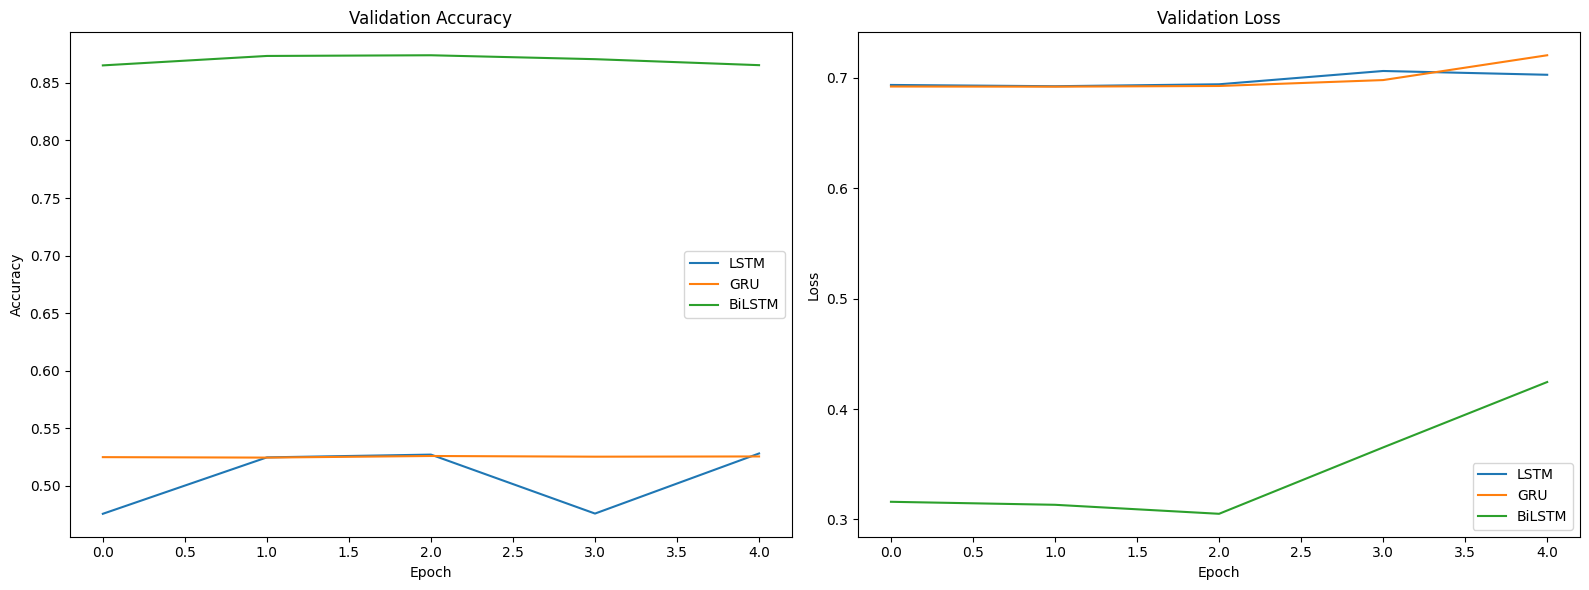

In [14]:
import matplotlib.pyplot as plt

def plot_histories(histories, labels):
    plt.figure(figsize=(16, 6))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(
    [history_lstm, history_gru, history_bilstm],
    ['LSTM', 'GRU', 'BiLSTM']
)


In [15]:
acc_lstm = lstm.evaluate(x_test_int, y_test)[1]
acc_gru = gru.evaluate(x_test_int, y_test)[1]
acc_bilstm = bilstm.evaluate(x_test_int, y_test)[1]

print(f"LSTM Test Accuracy: {acc_lstm*100:.2f}%")
print(f"GRU Test Accuracy: {acc_gru*100:.2f}%")
print(f"BiLSTM Test Accuracy: {acc_bilstm*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5165 - loss: 0.6999
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5162 - loss: 0.7184
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8725 - loss: 0.4121
LSTM Test Accuracy: 51.97%
GRU Test Accuracy: 51.94%
BiLSTM Test Accuracy: 86.96%


In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional

model = Sequential([
        Embedding(maxFeatures, embedding_dim, input_length=seqLength),
        Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Administrator\miniconda3\envs\DL\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
history_bilstm = model.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 116s 706ms/step - accuracy: 0.6983 - loss: 0.5554 - val_accuracy: 0.8602 - val_loss: 0.3179
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 690ms/step - accuracy: 0.9020 - loss: 0.2543 - val_accuracy: 0.8688 - val_loss: 0.3066
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 110s 699ms/step - accuracy: 0.9306 - loss: 0.1897 - val_accuracy: 0.8668 - val_loss: 0.3451
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 689ms/step - accuracy: 0.9382 - loss: 0.1708 - val_accuracy: 0.8608 - val_loss: 0.3455
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 112s 711ms/step - accuracy: 0.9535 - loss: 0.1367 - val_accuracy: 0.8638 - val_loss: 0.4029


In [9]:
acc_model = model.evaluate(x_test_int, y_test)[1]

print(f"Model Test Accuracy: {acc_model*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8661 - loss: 0.3890
Model Test Accuracy: 86.43%


In [10]:
from models import stacked_bilstm_model, cnn_bilstm_model, transformer_block_model, bidirectional_gru_model

models = [
    ("BiGRU", bidirectional_gru_model),
    ("Stacked BiLSTM", stacked_bilstm_model),
    ("CNN + BiLSTM", cnn_bilstm_model),
    ("Transformer Block", transformer_block_model)
]

histories = []
labels = []

for name, model_fn in models:
    print(f"\nTraining {name}...")
    model = model_fn(maxFeatures, seqLength, embedding_dim)
    history = model.fit(
        x_train_int, y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.2,
        verbose=2
    )
    histories.append(history)
    labels.append(name)



Training BiGRU...
Epoch 1/5
157/157 - 68s - 431ms/step - accuracy: 0.7725 - loss: 0.4574 - val_accuracy: 0.8318 - val_loss: 0.3646
Epoch 2/5
157/157 - 61s - 389ms/step - accuracy: 0.8943 - loss: 0.2621 - val_accuracy: 0.8590 - val_loss: 0.3271
Epoch 3/5
157/157 - 61s - 390ms/step - accuracy: 0.9283 - loss: 0.1890 - val_accuracy: 0.8582 - val_loss: 0.3363
Epoch 4/5
157/157 - 42s - 265ms/step - accuracy: 0.9510 - loss: 0.1414 - val_accuracy: 0.8596 - val_loss: 0.3898
Epoch 5/5
157/157 - 67s - 425ms/step - accuracy: 0.9649 - loss: 0.1046 - val_accuracy: 0.8526 - val_loss: 0.4358

Training Stacked BiLSTM...
Epoch 1/5
157/157 - 173s - 1s/step - accuracy: 0.8053 - loss: 0.4123 - val_accuracy: 0.8636 - val_loss: 0.3230
Epoch 2/5
157/157 - 167s - 1s/step - accuracy: 0.9233 - loss: 0.2063 - val_accuracy: 0.8668 - val_loss: 0.3390
Epoch 3/5
157/157 - 172s - 1s/step - accuracy: 0.9514 - loss: 0.1420 - val_accuracy: 0.8650 - val_loss: 0.3445
Epoch 4/5
157/157 - 191s - 1s/step - accuracy: 0.9692 -

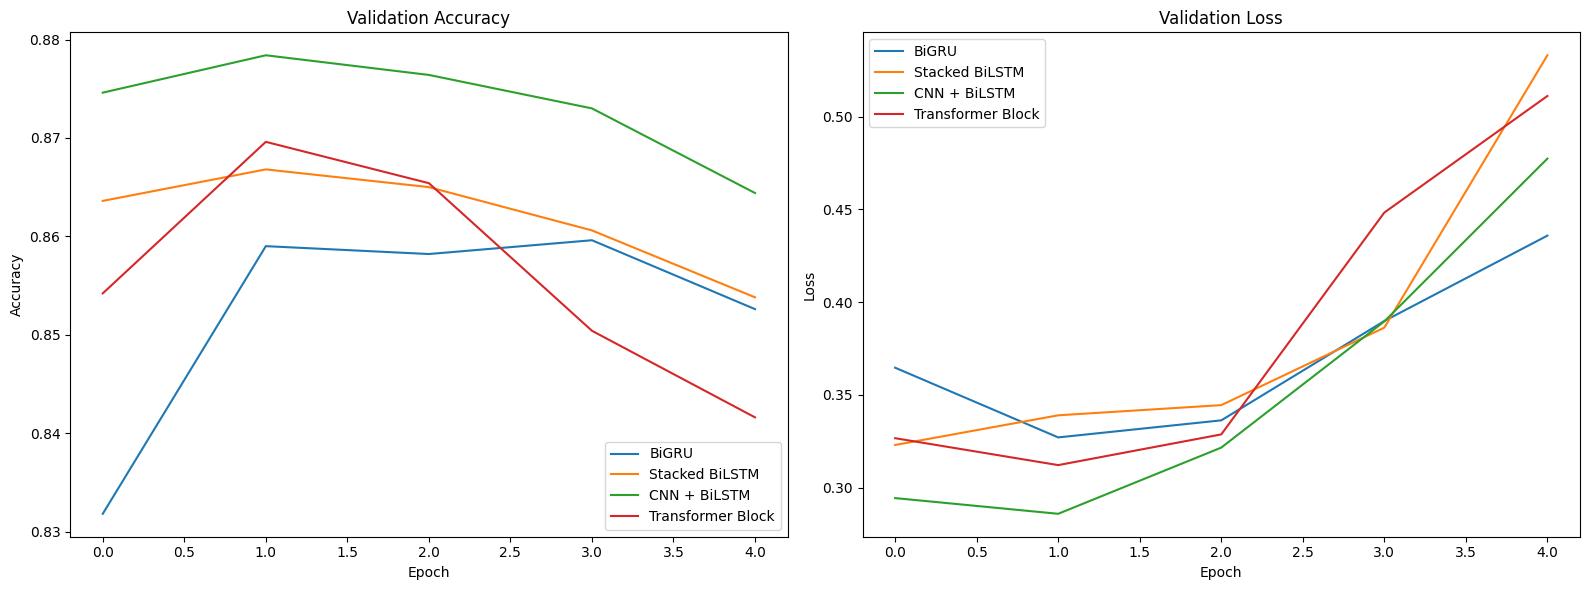

In [13]:
plot_histories(histories, labels)